In [1]:
# from google.colab import drive
# import sys

# drive.mount('/content/gdrive/')
# path = '/content/gdrive/MyDrive/Processamento Dados Conti/código/código/'
# sys.path.append(path)
path='./'

# Visualizações com o formato de heatmap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

df = pd.read_csv(path+'dados limpos/abastecimentos.csv')
dados_veiculos = pd.read_csv(path+'dados/informacoes_veiculos.csv')
dados_veiculos = dados_veiculos.rename(columns={'fleet_number': 'vehicle_number'})
df = pd.merge(left=df, right=dados_veiculos, on='vehicle_number', how='left')
df

,vehicle_number,vehicle_name,timestamp,consumption,liter_supply,km_driven,odometer,establishment_code,fuel_type_x,driver_registration,...,plate,vehicle_pto_use,vehicle_gas_reduction,tank_capacity,vehicle_brand,vehicle_classification_euro,vehicle_year,types_of_vehicles,fleet_type,fuel_type_y
0,100,truck_1709647004,1704713459000,3.440000,168.9,581.0,145835.0,1,DIESEL S-10 COMUM,0,...,LTV-7F37,nao,scr,300,mercedes,euro05,2018,NaN,Própria,NaN
1,100,truck_1709647004,1705044000000,3.210000,130.0,417.0,146252.0,1,DIESEL S-10 COMUM,0,...,LTV-7F37,nao,scr,300,mercedes,euro05,2018,NaN,Própria,NaN
2,100,truck_1709647004,1705381800000,3.410000,96.3,328.0,146580.0,1,DIESEL S-10 COMUM,0,...,LTV-7F37,nao,scr,300,mercedes,euro05,2018,NaN,Própria,NaN
3,100,truck_1709647004,1706099099000,3.496503,214.5,750.0,147330.0,1,DIESEL S-10 COMUM,0,...,LTV-7F37,nao,scr,300,mercedes,euro05,2018,NaN,Própria,NaN
4,100,truck_1709647004,1706764260000,3.346437,203.5,681.0,148011.0,1,DIESEL S-10 COMUM,0,...,LTV-7F37,nao,scr,300,mercedes,euro05,2018,NaN,Própria,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,147,truck_1709649612,1708968300000,5.440806,39.7,216.0,115820.0,1,DIESEL S-10 COMUM,718,...,KWM-9390,nao,scr,300,iveco,euro05,2014,NaN,Própria,NaN
927,147,truck_1709649612,1709281920000,9.192399,42.1,387.0,116207.0,1,DIESEL S-10 COMUM,719,...,KWM-9390,nao,scr,300,iveco,euro05,2014,NaN,Própria,NaN
928,147,truck_1709649612,1709366820000,14.150000,20.0,283.0,116490.0,1,DIESEL S-10 COMUM,720,...,KWM-9390,nao,scr,300,iveco,euro05,2014,NaN,Própria,NaN
929,147,truck_1709649612,1709548499000,4.230769,26.0,110.0,116600.0,1,DIESEL S-10 COMUM,721,...,KWM-9390,nao,scr,300,iveco,euro05,2014,NaN,Própria,NaN


In [3]:

df['driver_registration'] = df['driver_registration'].astype(str)
df['vehicle_number'] = df['vehicle_number'].astype(str)

# Ordenação
df = df.sort_values(by='driver_registration', kind='mergesort')
# df = df.sort_values(by='vehicle_pto_use', kind='mergesort')
df = df.sort_values(by='vehicle_type', kind='mergesort')

df.head(10)

,vehicle_number,vehicle_name,timestamp,consumption,liter_supply,km_driven,odometer,establishment_code,fuel_type_x,driver_registration,...,plate,vehicle_pto_use,vehicle_gas_reduction,tank_capacity,vehicle_brand,vehicle_classification_euro,vehicle_year,types_of_vehicles,fleet_type,fuel_type_y
41,102,truck_1709647939,1706344440000,3.129985,67.7,211.9,517503.9,1,DIESEL S-10 COMUM,30,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
42,102,truck_1709647939,1706611260000,3.128736,43.5,136.1,517715.8,1,DIESEL S-10 COMUM,31,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
43,102,truck_1709647939,1707120720000,3.130435,103.5,324.0,517851.9,1,DIESEL S-10 COMUM,32,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
44,102,truck_1709647939,1708075320000,3.129501,144.4,451.9,518175.9,1,DIESEL S-10 COMUM,33,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
45,102,truck_1709647939,1708588800000,3.129870,115.5,361.5,518627.8,1,DIESEL S-10 COMUM,34,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
46,102,truck_1709647939,1709104500000,3.130268,156.6,490.2,518989.3,1,DIESEL S-10 COMUM,35,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
47,102,truck_1709647939,1709379359000,3.130012,82.3,257.6,519479.5,1,DIESEL S-10 COMUM,36,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
48,102,truck_1709647939,1710147600000,3.130010,102.3,320.2,519737.1,1,DIESEL S-10 COMUM,37,...,KVZ-2J34,nao,nd,210,mercedes,euro03,2008,NaN,Própria,NaN
12,101,truck_1709647702,1704472799000,3.250000,115.4,375.0,40123.0,1,DIESEL S-10 COMUM,0,...,RKB-7G26,nao,scr,300,mercedes,euro05,2022,NaN,Própria,NaN
13,101,truck_1709647702,1704735000000,4.440000,65.1,289.0,40412.0,1,DIESEL S-10 COMUM,0,...,RKB-7G26,nao,scr,300,mercedes,euro05,2022,NaN,Própria,NaN


### Primeiro Scatter

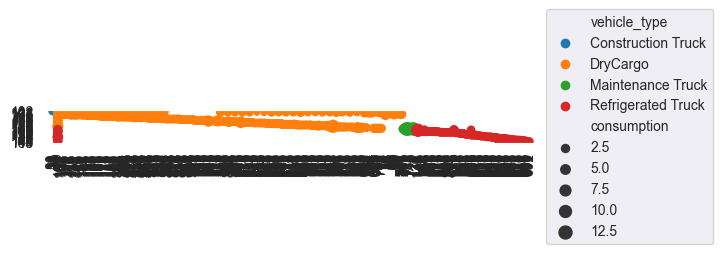

In [4]:

def styled_scatter(df, x = "driver_registration", y = "vehicle_number", size = "consumption", hue = "vehicle_type"):

    fig, ax = plt.subplots()
    g = sns.scatterplot(
        data=df,
        x=x,
        y=y,
        size=size,
        hue=hue,
        sizes=(20, 100),
        linewidth=0
    )

    ax.set(xlabel="", ylabel="", aspect="equal")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.margins(.02)
    for label in g.get_xticklabels():
        label.set_rotation(90)

    plt.show()

styled_scatter(df)

In [5]:

# df = df.sort_values(by='vehicle_pto_use', kind='mergesort')
# styled_scatter(df, hue="vehicle_type")

In [6]:

# df = df.sort_values(by='vehicle_pto_use', kind='mergesort')
# styled_scatter(df, hue="vehicle_pto_use")

In [7]:
# Ordenação
df = df.sort_values(by='driver_registration', kind='mergesort')
df = df.sort_values(by='vehicle_type', kind='mergesort')


In [8]:
def styled_grouped_heatmap(group):
    means = pd.pivot_table(
        df,
        values='consumption',
        index=[group, 'vehicle_number'],
        columns=['driver_registration'],
        aggfunc=np.mean
    )

    groups = means.groupby(group)
    n_groups = len(groups)
    hr, wr = [], []
    for tipo, data in groups:
        h, w = data.shape
        hr.append(h)
        wr.append(w)
    n_groups = len(groups)

    gridspec_kw={'height_ratios': hr}
    vertical, horizontal = means.shape
    f, axs = plt.subplots(
        figsize=(horizontal*1, vertical*1),
        nrows=n_groups,
        sharex=True,
        gridspec_kw=gridspec_kw,
        dpi=300
    )

    for i, (key, data) in enumerate(means.groupby(group)):
        data = data.droplevel(level=0)
        g = sns.heatmap(
            data=data,
            cbar=False,
            fmt=".1f",
            ax=axs[i],
            annot=True
        )
        g.set_facecolor('Black')
        g.set_title(key)
        g.set_xlabel('')
        axs[i].tick_params(axis='y', labelrotation=0)
    f.tight_layout()

styled_grouped_heatmap('vehicle_type')

ValueError: Image size of 216000x14400 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x000002AE79B4A660> (for post_execute):


ValueError: Image size of 216000x14400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 216000x14400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 216000x14400 with 4 Axes>

In [ ]:
# styled_grouped_heatmap('vehicle_pto_use')

In [ ]:
# df["pto_type"] = df["vehicle_pto_use"] + ", " + df["vehicle_type"]
# styled_grouped_heatmap('pto_type')

In [ ]:
# means = pd.pivot_table(
#     df,
#     values='consumption',
#     index=['driver_registration'],
#     columns=['pto_type'],
#     aggfunc=np.mean
# )
# for column in means:
#     sorted_means = means.sort_values(column)
#     sorted_means = sorted_means[sorted_means[column].notna()]
#     horizontal = len(sorted_means)
#     f, ax = plt.subplots(figsize=(horizontal*0.8, 6))
#     plt.ylim([0, 6])
#     sns.barplot(data = sorted_means, x=sorted_means.index, y=column)
#     f.tight_layout()

In [ ]:
means = pd.pivot_table(
    df,
    values='consumption',
    index=['driver_registration'],
    columns=['vehicle_type'],
    aggfunc=np.mean
)
for column in means:
    sorted_means = means.sort_values(column)
    sorted_means = sorted_means[sorted_means[column].notna()]
    horizontal = len(sorted_means)
    f, ax = plt.subplots()
    # plt.ylim([0, 8])
    sns.barplot(data = sorted_means, x=sorted_means.index, y=column)
    f.tight_layout()

In [ ]:
means = pd.pivot_table(
    df,
    values='consumption',
    index=['vehicle_type'],
    columns=['driver_registration'],
    aggfunc=np.mean
)
for column in means:
    sorted_means = means.sort_values(column)
    sorted_means = sorted_means[sorted_means[column].notna()]
    horizontal = len(sorted_means)
    f, ax = plt.subplots()
    # plt.ylim([0, 8])
    sns.barplot(data = sorted_means, x=sorted_means.index, y=column)
    f.tight_layout()

In [ ]:
for i, data in df.groupby('vehicle_type'):
    sum = pd.pivot_table(
        data,
        values='consumption',
        index=['driver_registration'],
        columns=['vehicle_number'],
        aggfunc=np.sum,
        dropna=True
    )

    freq = pd.pivot_table(
        data,
        values='consumption',
        index=['driver_registration'],
        columns=['vehicle_number'],
        aggfunc='count',
        dropna=True
    )

    horizontal = len(sum)
    for column in sum:
        sum[column] = sum[column]/freq.sum(axis=1)

    sum['mean'] = sum.sum(axis=1)
    sum = sum.sort_values('mean')

    quantile_range = 0.25
    quantile_range = np.ceil(len(sum)*quantile_range)
    sum = sum.head(int(quantile_range))

    sum = sum.drop(columns='mean')
    horizontal = len(sum)
    ax = sum.plot(kind='bar', stacked=True)
    ax.set_title(i)
    # ax.set_ylim(0, 6)

    plt.legend(bbox_to_anchor=(1.02, 0), loc='lower left', borderaxespad=0)
    plt.show()

In [ ]:


for i, data in df.groupby('vehicle_type'):
    sum = pd.pivot_table(
        data,
        values='consumption',
        index=['vehicle_number'],
        columns=['driver_registration'],
        aggfunc=np.sum,
        dropna=True
    )

    freq = pd.pivot_table(
        data,
        values='consumption',
        index=['vehicle_number'],
        columns=['driver_registration'],
        aggfunc='count',
        dropna=True
    )

    for column in sum:
        sum[column] = sum[column]/freq.sum(axis=1)

    sum['mean'] = sum.sum(axis=1)
    sum = sum.sort_values('mean')

    sum = sum.drop(columns='mean')
    horizontal = len(sum)
    ax = sum.plot(kind='bar', stacked=True)
    ax.set_title(i)
    # ax.set_ylim(0, 6)
    plt.legend(bbox_to_anchor=(1.02, 0), loc='lower left', borderaxespad=0, ncol = 3)
    plt.show()